In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys.py import weather_api_key
#C:\Users\pasi1\UNC_homework\Web-Design-Challenge\Web_Visualizations\api keys\api_keys.py
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

ModuleNotFoundError: No module named 'api_keys'

In [6]:
# Output File (CSV)
output_data_file = "Web_Visualizations\Resources\cities.csv"
#C:\Users\pasi1\UNC_homework\Web-Design-Challenge\Web_Visualizations\Resources\cities.csv
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-6-7c0ead05adf1>, line 2)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

NameError: name 'citipy' is not defined

In [5]:
#Perform Weather Check
weatherlist={}

for index in range(0,len(cities)):
    city=cities[index]
    print (f'processing record |{city}')
    url=f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&APPID={weather_api_key}'   

    response=requests.get(url)

    if response.status_code==200:

        weather_data=response.json()

        city_weather=[
            city,
            weather_data['clouds']['all'],
            weather_data['sys']['country'],
            weather_data['dt'],
            weather_data['main']['humidity'],
            weather_data['coord']['lat'],
            weather_data['coord']['lon'],
            weather_data['main']['temp_max'],
            weather_data['wind']['speed']
        ]
        
        weatherlist[index]=city_weather
    else:
        print('city not found. skipping')
print('------------------------------------------------------------')
print('data retrieval complete')
print('------------------------------------------------------------')

------------------------------------------------------------
data retrieval complete
------------------------------------------------------------


In [5]:
#Export City Data into a csv and Display the DataFrame
df=pd.DataFrame.from_dict(weatherlist,orient='index',columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])
df.to_csv(output_data_file, ",",header=True,columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'],index=True,index_label='City_ID')
df

FileNotFoundError: [Errno 2] No such file or directory: 'Resources/cities.csv'

In [6]:
# Describe the DataFrame
df.describe()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.to_html(buf=None, columns=None, col_space=None, header=True, index=True, na_rep='NaN', formatters=None, float_format=None, sparsify=None, index_names=True, justify=None, bold_rows=True, classes=None, escape=True, max_rows=None, max_cols=None, show_dimensions=False, notebook=False)
#Render a DataFrame as an HTML table.


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>City</th>\n      <th>Cloudiness</th>\n      <th>Country</th>\n      <th>Date</th>\n      <th>Humidity</th>\n      <th>Lat</th>\n      <th>Lng</th>\n      <th>Max Temp</th>\n      <th>Wind Speed</th>\n    </tr>\n  </thead>\n  <tbody>\n  </tbody>\n</table>'

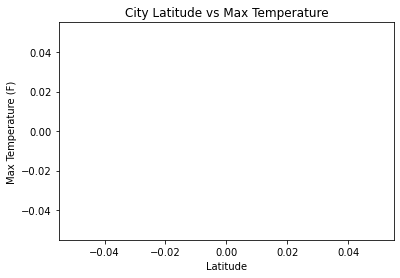

In [10]:
# Scatter Plot Lattitude vs Temperature
x=df['Lat']
y=df['Max Temp']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.show()

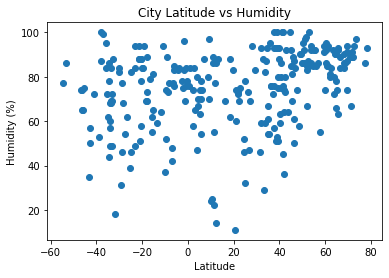

In [14]:
# Scatter Plot Lattitude vs Humidity
x=df['Lat']
y=df['Humidity']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.show()

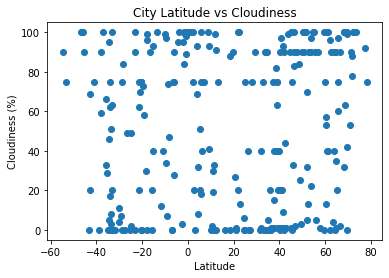

In [15]:
# Scatter Plot Lattitude vs Cloudiness
x=df['Lat']
y=df['Cloudiness']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.show()

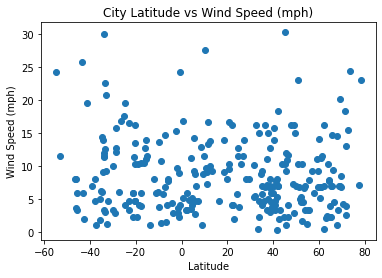

In [17]:
# Scatter Plot Lattitude vs Wind Speed
x=df['Lat']
y=df['Wind Speed']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph)')
plt.show()